# Linear Regression Practice
- Trying to understand the sklearn library as I am only really used to regclass in r for statistic models. 
- For this I followed along to NueralNine's video (https://www.youtube.com/watch?v=Wqmtf9SA_kk)

In [79]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [51]:
data = pd.read_csv('housing.csv')

In [52]:
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [53]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [54]:
data.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [55]:
data.dropna(inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


In [56]:
x = data.drop(['median_house_value'], axis=1)
y = data['median_house_value']

In [57]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = .3)

In [58]:
train_data = x_train.join(y_train)

In [59]:
train_data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
18638,-121.98,36.99,14.0,6787.0,1454.0,3416.0,1357.0,3.5943,NEAR OCEAN,262400.0
18412,-121.80,37.26,18.0,3631.0,947.0,2357.0,757.0,2.8750,<1H OCEAN,184400.0
5616,-118.26,33.78,21.0,2188.0,706.0,2265.0,652.0,1.9923,NEAR OCEAN,164700.0
18571,-121.76,36.92,46.0,947.0,257.0,1120.0,264.0,3.4125,<1H OCEAN,160700.0
15919,-122.42,37.73,52.0,3230.0,654.0,1765.0,611.0,3.3333,NEAR BAY,292300.0


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

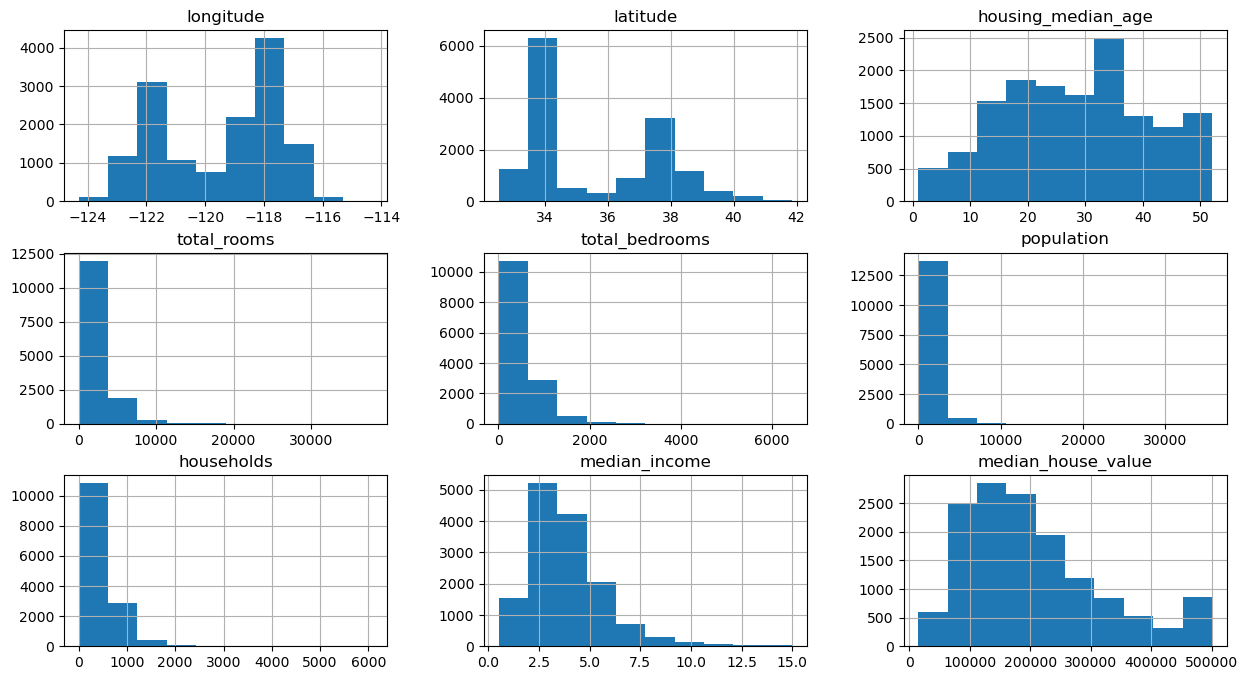

In [60]:
train_data.hist(figsize=(15,8))

C:\Users\jackg\AppData\Local\Temp\ipykernel_48616\3119725513.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train_data.corr(), annot=True)


<Axes: >

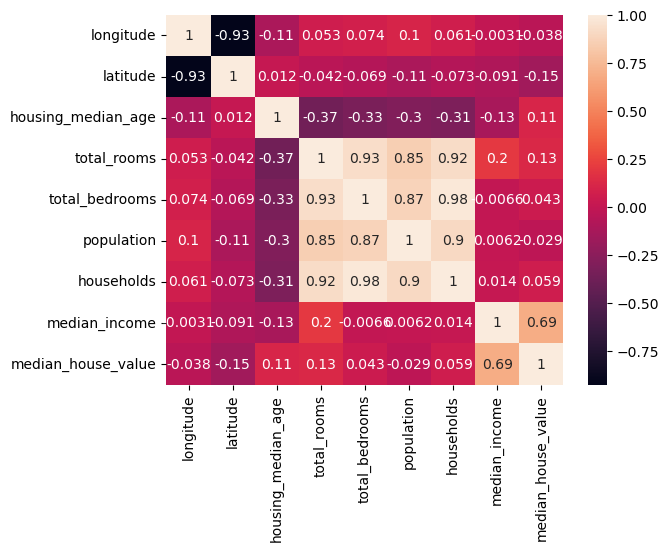

In [61]:
sns.heatmap(train_data.corr(), annot=True)

In [62]:
#creating logarithmic transormations to some of the predictor variables such as 

train_data['total_rooms'] = np.log(train_data['total_rooms']+1)
train_data['total_bedrooms'] = np.log(train_data['total_bedrooms']+1)
train_data['population'] = np.log(train_data['population']+1)
train_data['households'] = np.log(train_data['households']+1)


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

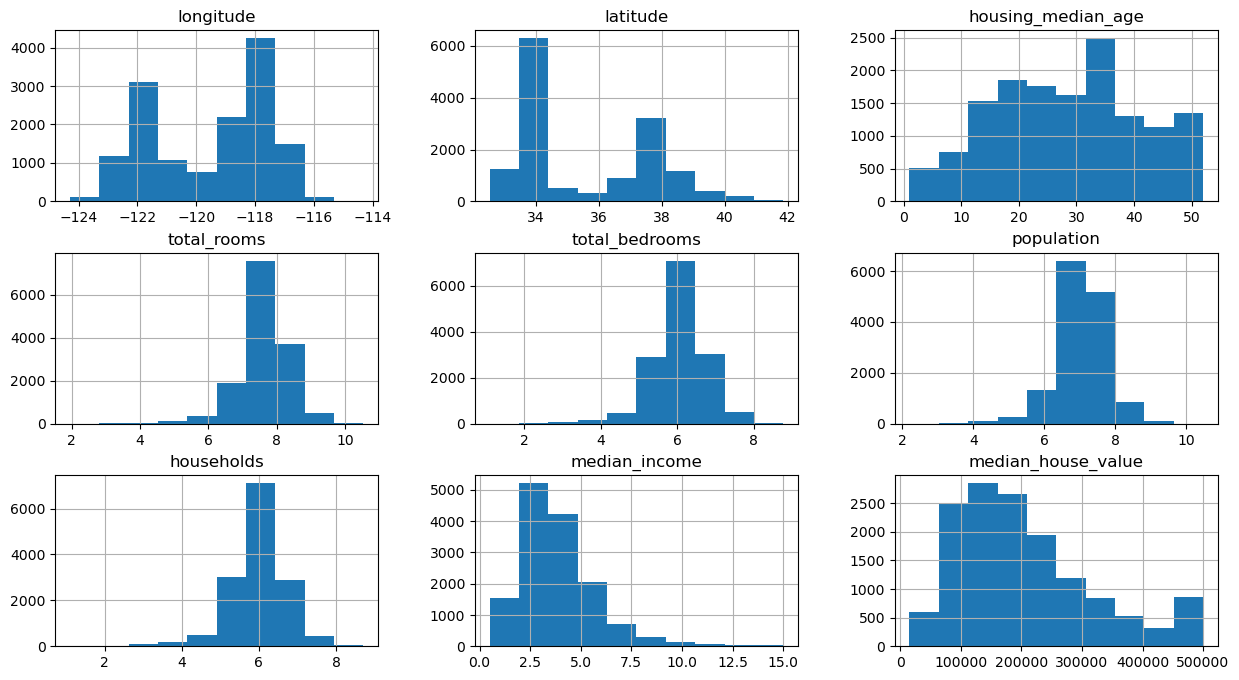

In [63]:
train_data.hist(figsize=(15,8))

In [66]:
train_data = train_data.join(pd.get_dummies(train_data.ocean_proximity)).drop(['ocean_proximity'], axis=1)

AttributeError: 'DataFrame' object has no attribute 'ocean_proximity'

In [67]:
train_data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
18638,-121.98,36.99,14.0,8.822912,7.282761,8.136518,7.213768,3.5943,262400.0,0,0,0,0,1
18412,-121.80,37.26,18.0,8.197539,6.854355,7.765569,6.630683,2.8750,184400.0,1,0,0,0,0
5616,-118.26,33.78,21.0,7.691200,6.561031,7.725771,6.481577,1.9923,164700.0,0,0,0,0,1
18571,-121.76,36.92,46.0,6.854355,5.552960,7.021976,5.579730,3.4125,160700.0,1,0,0,0,0
15919,-122.42,37.73,52.0,8.080547,6.484635,7.476472,6.416732,3.3333,292300.0,0,0,0,1,0


<Axes: >

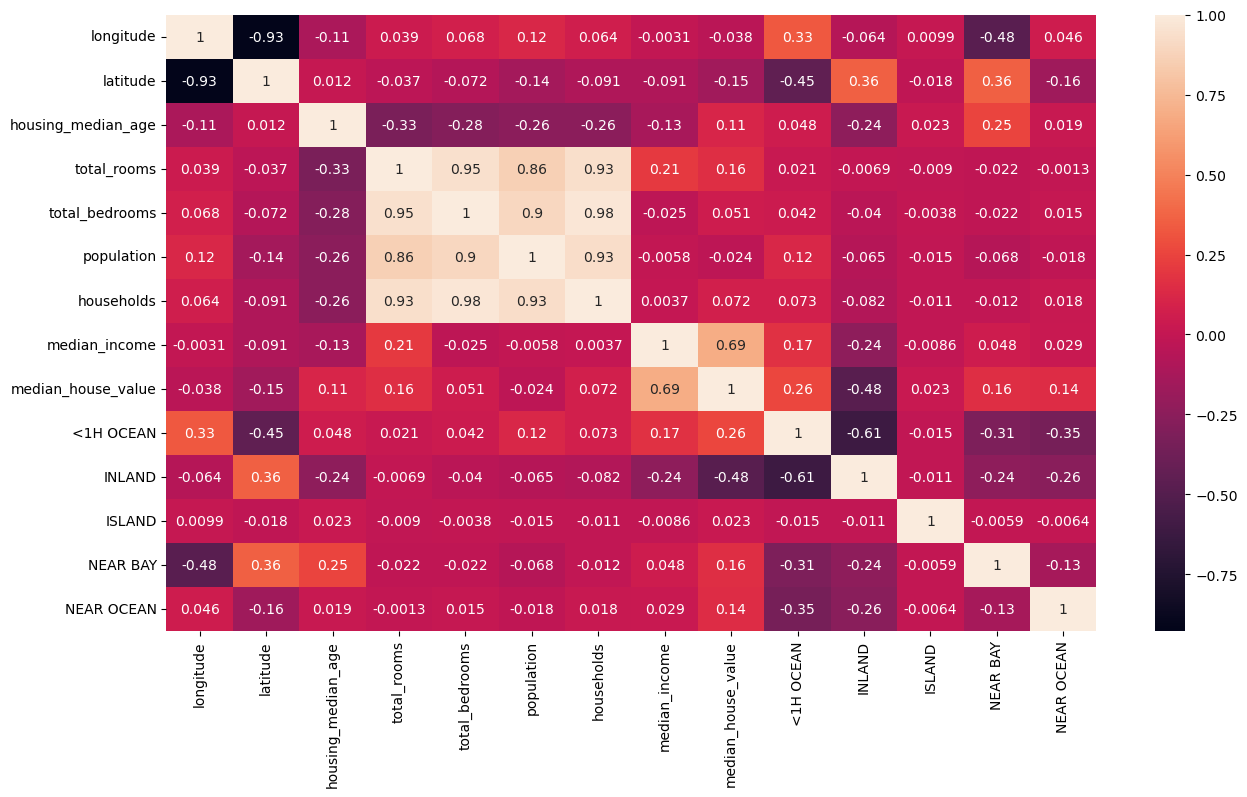

In [72]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(), annot=True)

<Axes: xlabel='latitude', ylabel='longitude'>

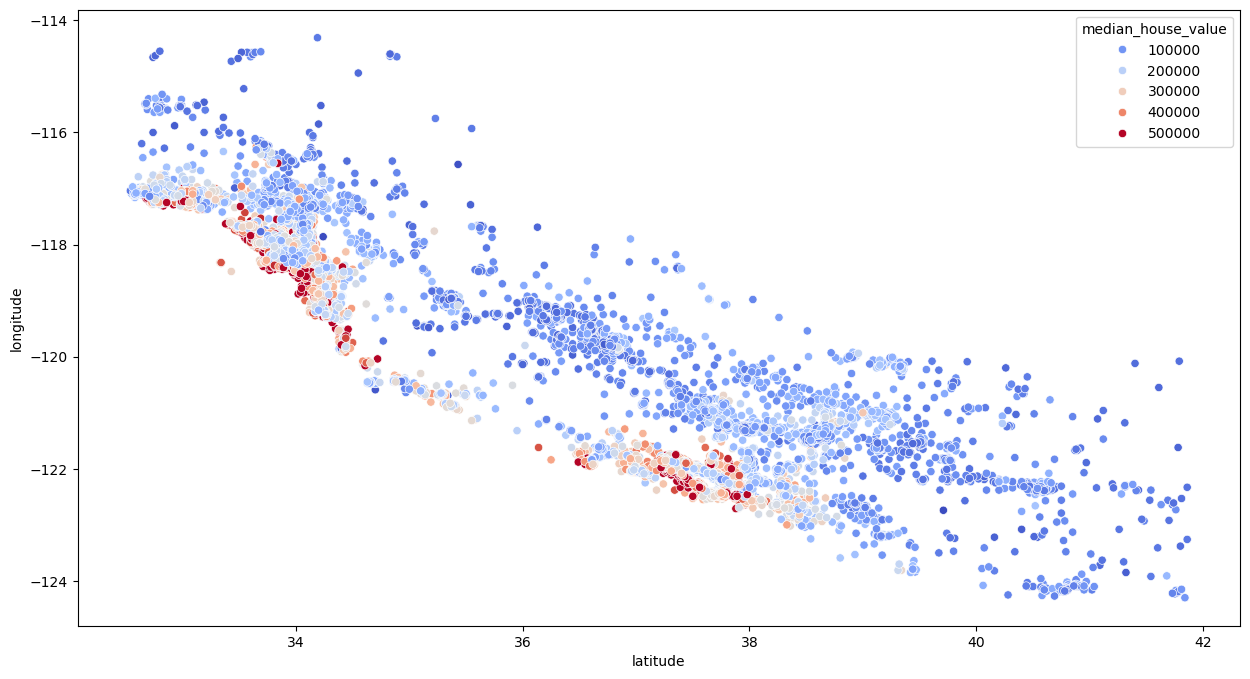

In [76]:
plt.figure(figsize=(15,8))
sns.scatterplot(x='latitude', y='longitude', data=train_data, hue='median_house_value', palette='coolwarm')

In [78]:
train_data['bedroom_ratio'] = train_data['total_bedrooms']/train_data['total_rooms']
train_data['household_rooms'] = train_data['total_rooms']/train_data['households']